In [1]:
# Import pandas, numpy and matplotlib, seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

KeyboardInterrupt: 

In [2]:
# Load the data
df = pd.read_excel('Felix_final_proj_data.xlsm')


In [3]:
# Check the first few rows of the data
df.head()

,DS_ID,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,...,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,10000,Female,0,Yes,No,1,No,Maryville,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,30,30.0,No
1,10001,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,57,1890.0,No
2,10002,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,54,108.0,Yes
3,10003,Male,0,No,No,45,No,Maryville,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42,1841.0,No
4,10004,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,71,152.0,Yes


In [4]:
# Check for null values
df.isnull().sum()

DS_ID               0
gender              0
Management          0
USAcitizen          0
Married             0
MonthsInUnion       0
ContinuingEd        0
FeatureA            0
Connectivity        0
FeatureC            0
FeatureD            0
FeatureE            0
FeatureF            0
FeatureG            0
FeatureB            0
DuesFrequency       0
PaperlessBilling    0
PaymentMethod       0
MonthlyDues         0
TotalDues           8
LeftUnion           0
dtype: int64

In [5]:
# Statistical summary of the data
df.describe()

,DS_ID,Management,MonthsInUnion,MonthlyDues,TotalDues
count,7028.000000,7028.000000,7028.000000,7028.000000,7020.000000
mean,13513.500000,0.161924,33.931559,82.315595,2281.826923
std,2028.953178,0.368407,38.111556,483.998857,2266.076113
min,10000.000000,0.000000,0.000000,18.000000,19.000000
25%,11756.750000,0.000000,9.000000,36.000000,401.000000
50%,13513.500000,0.000000,29.000000,70.000000,1396.000000
75%,15270.250000,0.000000,56.000000,90.000000,3792.750000
max,17027.000000,1.000000,687.000000,22632.000000,8685.000000


In [6]:
# Check the data types
df.dtypes

DS_ID                 int64
gender               object
Management            int64
USAcitizen           object
Married              object
MonthsInUnion         int64
ContinuingEd         object
FeatureA             object
Connectivity         object
FeatureC             object
FeatureD             object
FeatureE             object
FeatureF             object
FeatureG             object
FeatureB             object
DuesFrequency        object
PaperlessBilling     object
PaymentMethod        object
MonthlyDues           int64
TotalDues           float64
LeftUnion            object
dtype: object

In [7]:
# Impute missing values for TotalDues
df['TotalDues'] = df['TotalDues'].fillna(df['TotalDues'].mean())

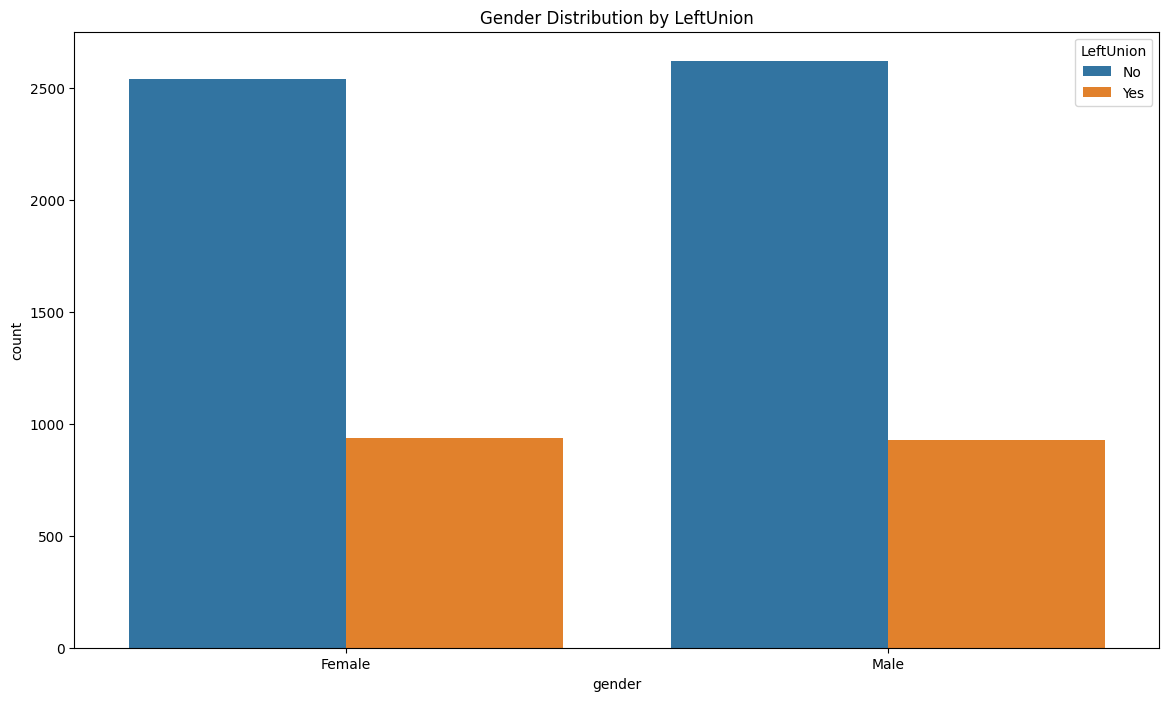

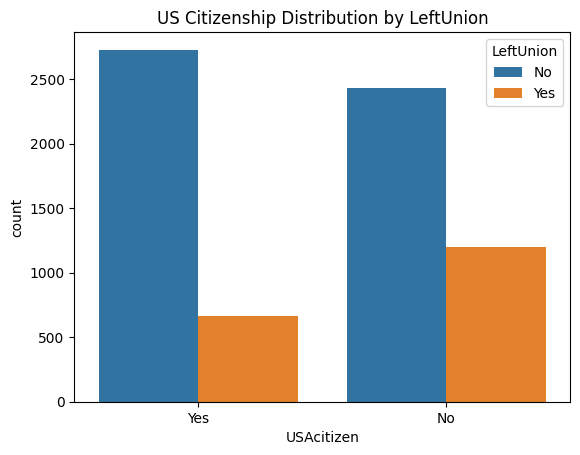

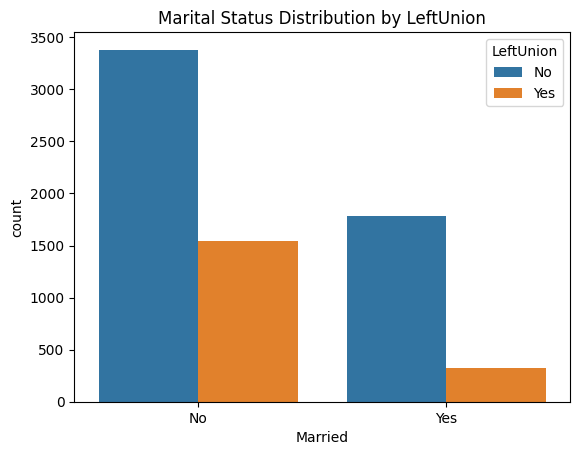

In [8]:
plt.figure(figsize=(14, 8))

# Count plots for each categorical feature
sns.countplot(x='gender', hue='LeftUnion', data=df)
plt.title('Gender Distribution by LeftUnion')
plt.show()

sns.countplot(x='USAcitizen', hue='LeftUnion', data=df)
plt.title('US Citizenship Distribution by LeftUnion')
plt.show()

sns.countplot(x='Married', hue='LeftUnion', data=df)
plt.title('Marital Status Distribution by LeftUnion')
plt.show()

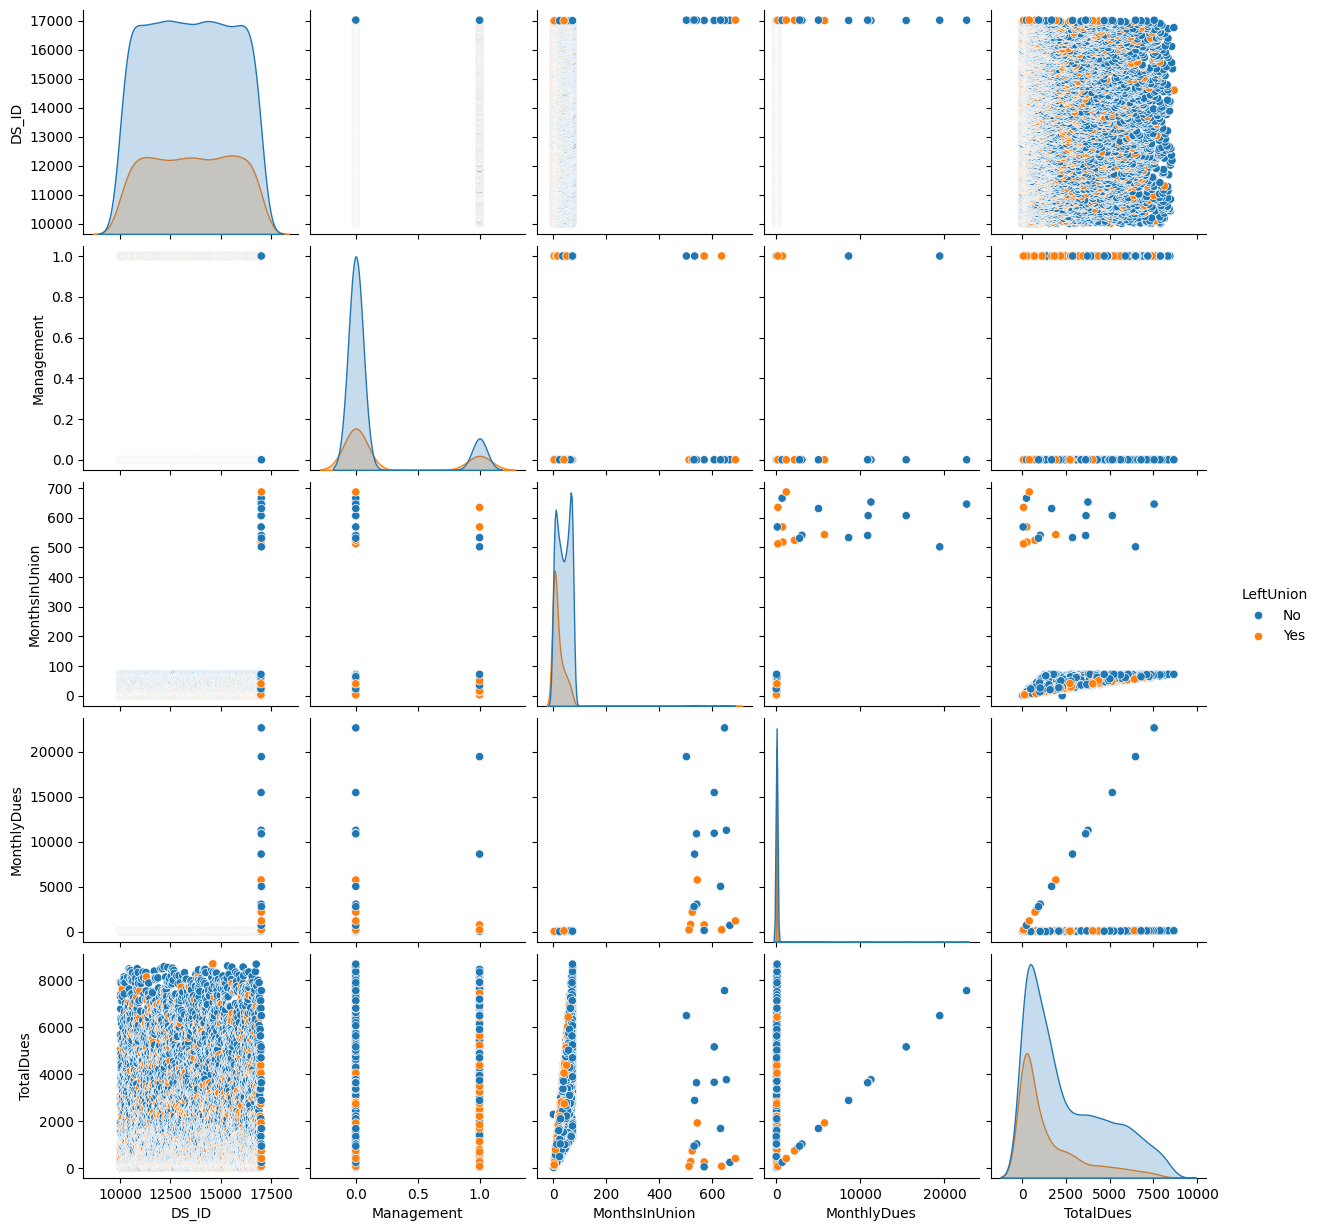

In [9]:
# Pair plot of categorical variables
sns.pairplot(df, hue='LeftUnion')



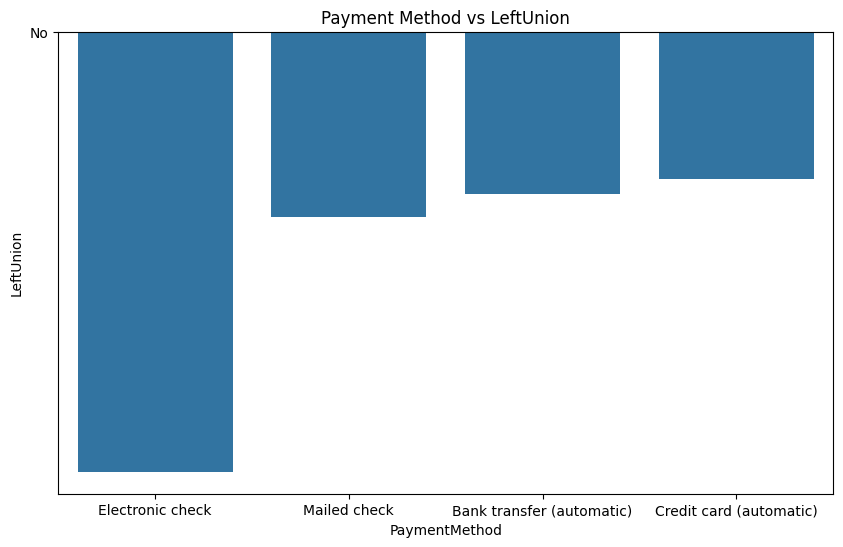

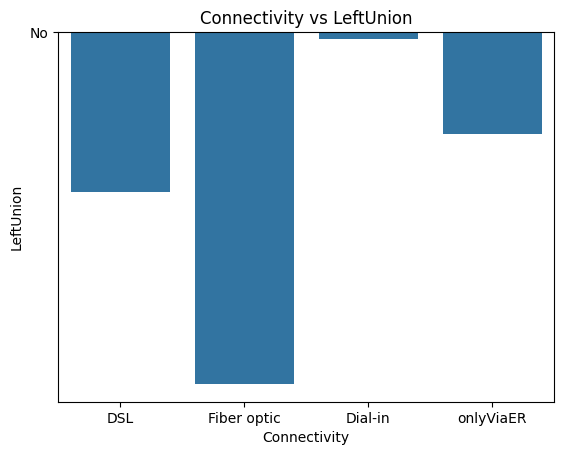

In [10]:
plt.figure(figsize=(10, 6))

# Bar plot between PaymentMethod and LeftUnion
sns.barplot(x='PaymentMethod', y='LeftUnion', data=df, errorbar=None)
plt.title('Payment Method vs LeftUnion')
plt.show()

# Bar plot between Connectivity and LeftUnion
sns.barplot(x='Connectivity', y='LeftUnion', data=df, errorbar=None)
plt.title('Connectivity vs LeftUnion')
plt.show()


/var/folders/hj/tkh_28q113v9m_2735jh2fyw0000gp/T/ipykernel_68136/3478921580.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


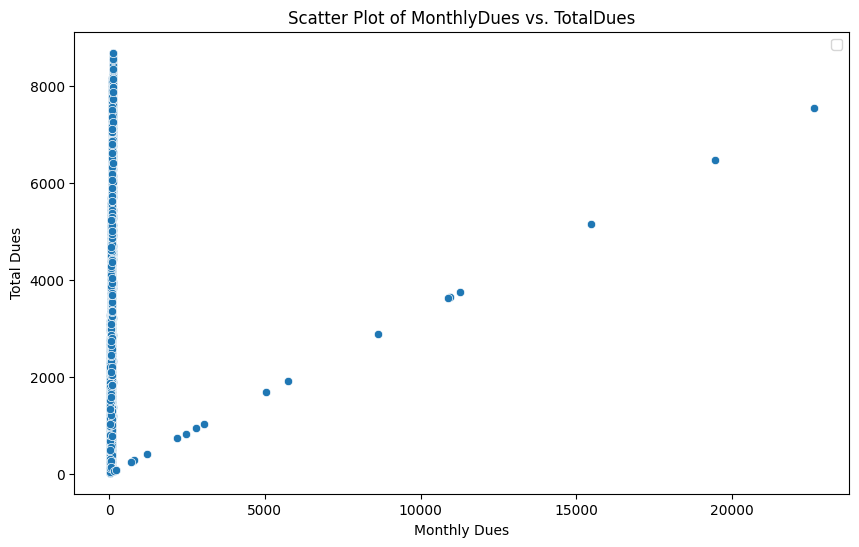

In [11]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyDues', y='TotalDues', data=df)

# Add a title and labels
plt.title('Scatter Plot of MonthlyDues vs. TotalDues')
plt.xlabel('Monthly Dues')
plt.ylabel('Total Dues')

# Display the plot with outliers marked
plt.legend()
plt.show()

In [12]:
# Remove outliers when Monthly dues is less than 15000
df = df[df['MonthlyDues'] < 15000]


/var/folders/hj/tkh_28q113v9m_2735jh2fyw0000gp/T/ipykernel_68136/3478921580.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


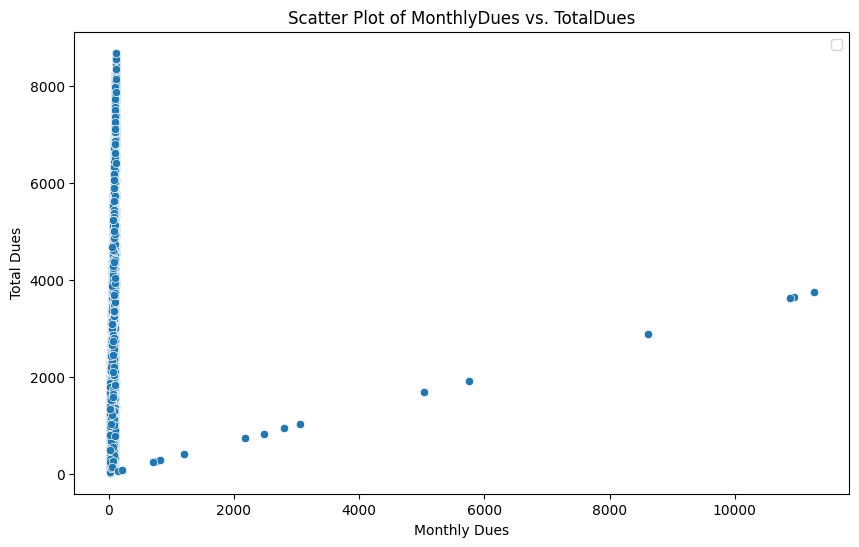

In [13]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyDues', y='TotalDues', data=df)

# Add a title and labels
plt.title('Scatter Plot of MonthlyDues vs. TotalDues')
plt.xlabel('Monthly Dues')
plt.ylabel('Total Dues')

# Display the plot with outliers marked
plt.legend()
plt.show()

In [14]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [15]:
# drop 'FeatureA', 'FeatureC', 'FeatureD', 'FeatureE', 'FeatureF', 'FeatureG', 'FeatureB' columns
df = df.drop(['DS_ID','FeatureA', 'FeatureC', 'FeatureD', 'FeatureE', 'FeatureF', 'FeatureG', 'FeatureB', 'Connectivity'], axis=1)

In [16]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [17]:
# Apply LabelEncoder to each categorical column (if needed)
label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [18]:
# Apply StandardScaler to numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [19]:
df.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,0,-0.439437,1,0,-0.899394,0,0,1,2,-0.161348,-0.994101,0
1,1,-0.439437,0,0,0.008356,1,1,0,3,-0.062704,-0.172337,0
2,1,-0.439437,0,0,-0.871886,1,0,1,3,-0.073664,-0.959640,1
3,1,-0.439437,0,0,0.310939,0,1,0,0,-0.117506,-0.193986,0
4,0,-0.439437,0,0,-0.871886,1,0,1,2,-0.011554,-0.940200,1


In [20]:
# Define the target and features
X = df.drop('LeftUnion', axis=1)  
y = df['LeftUnion']            


In [21]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5620, 11), (1405, 11), (5620,), (1405,))

## Linear Regression

In [24]:
# Import Linear Regression
from sklearn.linear_model import LogisticRegression

In [25]:
# Create a Linear Regression model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Predict the target
y_pred = model.predict(X_test)

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7900355871886121


In [27]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n{conf_matrix}')

Confusion Matrix: 
[[944  86]
 [209 166]]


## Decision Tree

In [28]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [29]:
# Create a Decision Tree model
model = DecisionTreeClassifier()

# Fit the model
model.fit(X_train, y_train)

# Predict the target
y_pred = model.predict(X_test)



In [30]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7245551601423488


In [31]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n{conf_matrix}')

Confusion Matrix: 
[[822 208]
 [179 196]]


In [32]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
# Create a Random Forest model
model = RandomForestClassifier()

# Fit the model
model.fit(X_train, y_train)

# Predict the target
y_pred = model.predict(X_test)

In [34]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7857651245551601


In [35]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n{conf_matrix}')

Confusion Matrix: 
[[916 114]
 [187 188]]


In [36]:
# Import SVC
from sklearn.svm import SVC

In [37]:
# Create a SVC model
model = SVC()

# Fit the model
model.fit(X_train, y_train)

# Predict the target
y_pred = model.predict(X_test)

In [38]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.802846975088968


In [39]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n{conf_matrix}')

Confusion Matrix: 
[[955  75]
 [202 173]]
